Data can be visually represented in a number of ways. In this post, we will construct four different statistics plots using Python: Bar Graph with error bars, histogram, violin plot and probability plot. Each of these types of plots shows the confidence or precision in a set of measurements or calculated values.

Bar charts without error bars give the illusion that a measured or calculated value is known to a high precision. In this post we will build a bar chart for the coefficient of thermal expansion (CTE) for three different materials based on a small data set. We will then add error bar to this chart based on the standard deviation of the data.

## Prerequisits

In order to build the four plots in this post, you'll need to have a couple of things in place:

 * **Computer**
 * **Python**
 * **Seaborn, NumPy, and Pandas**
 * **Jupyter notebook** (optional)
 * **Data**

**Computer** - to create the statistics plots this post, you'll need a computer. A laptop or desktop computer will both work. While it's possible to create the the plots with a Chromebook, tablet, or phone - that's a bit more complicated and beyond the scope of this post.

**Python** - You need to have Python installed on your computer. I recommend installing the Anaconda Distribution of Python. See this post to see how to install Anaconda on your computer.

**Seaborn, NumPy, and Pandas** - We'll build our inset curve using a Python plotting library called Seaborn. Seaborn is a visualization layer on top of Matplotlib. Matplotlib can make many plot types, but Seaborn adds a slightly different interface and plots styled in a pleasing way. If you installed Anaconda, Seaborn is already installed. If you installed Python from somewhere else, you'll need to install Seaborn. NumPy is a Python library for numeric computation. We'll use NumPy to make a few calculations. Pandas, a Python library for working with tabular data, will help us bring the data into our Python program.

You can install Seaborn, NumPy, and Pandas with the Anaconda Prompt using the commands below:

```text
> conda install matplotlib numpy pandas
```


Alternatively, you can use a terminal and the Python package manager pip to install Seaborn, NumPy, and Pandas.

```text
$ pip install matplotlib numpy pandas
```

**Jupyter notebook** - This is optional, but you can enter the code in this post into a Jupyter notebook and see the plot produced in the same Jupyter notebook. Alternatively, you can enter the code into a .py file and run the .py file to produce the plot. As long as the Anaconda distribution of Python is installed on your computer, you use a Jupyter notebook. See how to open Jupyter notebook in this post.

**Data** - The data we are going to plot is from a couple .xls data files. You can download these files using the links below:

[aluminum6061.xls](#)

[steel1045.xls](#)

Move these .xls data files into the same folder on your computer as your Jupyter notebook or .py file that contains your code.

Once these pre-requisites are in place, it's time to start building our inset curve!


Error bars are useful in engineering to show the confidence or precision in a set of measurements or calculated values. Bar charts without error bars give the illusion that a measured or calculated value is known to a high precision. In this post we will build four different statistical plots with Python and Seaborn. 

The finished compilation of the charts is shown below. The bar graph is on the top followed by the historgram, box plot and violin plot.

![plot with error bars]({static}/images/bar_plot_with_error_bars.png)

To build these plots, we will use the dataset below. The data is in a .csv file and has three columns. The data represents the density of four different shaped blocks from Ikea. The idea is to see if the density of each shape is different. If the density of each shape is different, one possible theory is that the shapes are made of different types of wood. We will use the statistics plots to help us visualize the problem. Each shape has about 100 density measurements. The first column is for rectangles, the second column is for squares the third column is triagles and the fourth column is cylinders. All of the density measurements are in units of g/cm<sup>3</sup>.  The .csv file looks something like the table below:


## Setting up the virtual environment and installing packages

In order to build our first plot, we need to fire up a new virtual environment with numpy, pandas and matplotlib installed. 

To get going, we'll use the **conda prompt** to create a new virtual environment. Select **Anaconda Prompt** from the windows start menu.
The install the modules using ```conda install```. I like using the Anaconda distribution of Python because it makes creating and managing virtual environments easy on the three major computing platforms

![conda prompt on windows start menu]({static}/images/conda_in_windows_start_menu.png)

```
(C:\Users\peter.kazarinoff\AppData\Local\Continuum\Anaconda3) C:\Users\peter.kazarinoff>conda create -n plotenv
```

Then to activate our new virtual environment, type the following into the **conda prompt**

```
(C:\Users\peter.kazarinoff\AppData\Local\Continuum\Anaconda3) C:\Users\peter.kazarinoff>activate errorbars
(plotenv) C:\Users\peter.kazarinoff>

```

Now we install the packages we need to build the plots. I'm using **conda** to do this, but pip would work as well. If you are using Mac OSX, using **conda** to create your virtual environment means that you can view matplotlib plots by running your script from the command line with ```(plotenv)$ pythonw bar_plot.py```

```
(errorbars) C:\Users\peter.kazarinoff>conda install matplotlib
(errorbars) C:\Users\peter.kazarinoff>conda install pandas
(errorbars) C:\Users\peter.kazarinoff>conda install seaborn
```

Make sure that our ```(errorbars)``` virtual environment has matplotlib, pandas and seaborn installed:

```
(errorbars) C:\Users\peter.kazarinoff> conda list
pandas
matplotlib
seaborn
```

With the virtual environment set up and the packages installed, we can move on to our first plot.

## Bar Chart with Error Bars

The first plot we will create is a bar chart with error bars. 
Open a new Python script called ***bar_plot.py***. At the top of the script we need to import pandas matplotlib and seaborn. 

![panda_doodle]({static}/images/panda_doodle.png)

We'll use pandas to read in the data from the .csv file, seaborn to build the plot and matplot lib to display it. 

In [1]:
import numpy as np
import seaborn as sns
sns.set_theme()

Next we need to read in our data.

In [2]:
aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5 , 2.1e-5])
metal_data = np.array([aluminum,copper,steel]).transpose()

Now it's time to build our plot. We are going to build a bar chart with three different bars, one bar for each metal: aluminum, copper, and steel. We'll use **seaborn** to build the plot. **seaborn** produces great looking statistical plots. We are going to put labels on the x-axis that shows each material name and a label on the y-axis that shows the title "Coefficient of thermal expansion (/degree C)".

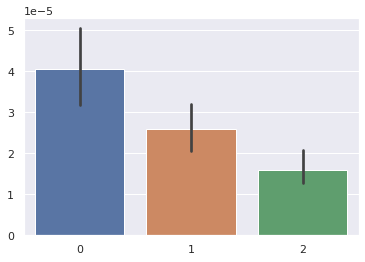

In [3]:
ax = sns.barplot(data=metal_data)

It looks pretty good, but I like to have caps on the error bars.

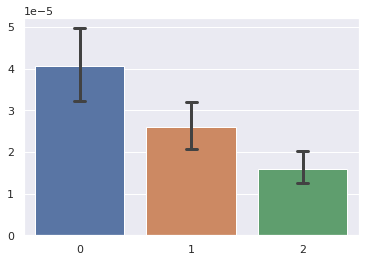

In [4]:
ax = sns.barplot(data=metal_data, errwidth=3, capsize=0.1)

Now add an axis label and title. Our y-axis is density in $g/cm^3$. To do this we'll modify the ```ax``` object axis labels with ```ax.set_ylabel()``` and ```ax.set_title```. seaborn creates a matplotlib axis object when we called the ```sns.barplot()``` function. That means we can use any of the methods you can call on a regular matplotlib axis object. 

[Text(0, 0, 'aluminum'), Text(1, 0, 'copper'), Text(2, 0, 'steel')]

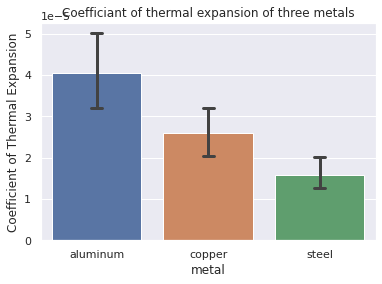

In [5]:
ax = sns.barplot(data=metal_data,errwidth=3, capsize=0.1)
ax.set_xlabel("metal")
ax.set_ylabel("Coefficient of Thermal Expansion")
ax.set_title("Coefficiant of thermal expansion of three metals")
ax.set_xticklabels(["aluminum","copper","steel"])

### Violin Plot

<AxesSubplot:>

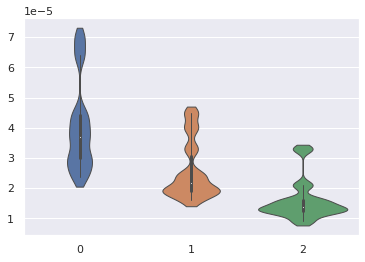

In [6]:
sns.violinplot(data=metal_data, bw=.2, cut=1, linewidth=1)

<AxesSubplot:>

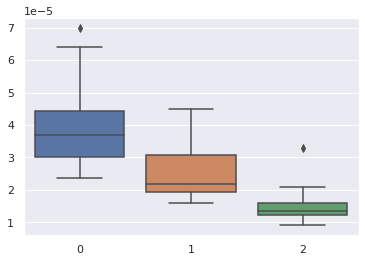

In [7]:
sns.boxplot(data=metal_data)

<AxesSubplot:>

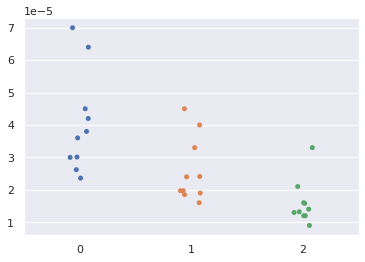

In [8]:
sns.stripplot(data=metal_data)

<AxesSubplot:>

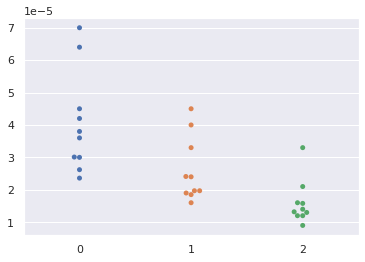

In [9]:
sns.swarmplot(data=metal_data)